# Exploring the datasets
## Preliminary analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch

In [30]:
#ds_selector='.\\datasets\\kaggle'
ds_selector='.\\datasets\\CICDDoS2019\\train'

In [31]:
csv_files = []
for dirname, _, filenames in os.walk(ds_selector):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        csv_files.append(csv_file)
csv_files

['.\\datasets\\CICDDoS2019\\train\\DrDoS_DNS.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_LDAP.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_MSSQL.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_NetBIOS.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_NTP.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_SNMP.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_SSDP.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_UDP.csv',
 '.\\datasets\\CICDDoS2019\\train\\Syn.csv',
 '.\\datasets\\CICDDoS2019\\train\\TFTP.csv',
 '.\\datasets\\CICDDoS2019\\train\\UDPLag.csv']

In [4]:
sizes = [str(os.path.getsize(file)/(2.0**30)) + " GB" for file in csv_files]
sizes

['1.9867978505790234 GB',
 '0.8543043183162808 GB',
 '1.7594376169145107 GB',
 '1.5809012847021222 GB',
 '0.6007110755890608 GB',
 '2.02337262686342 GB',
 '1.1666549546644092 GB',
 '1.4026084644719958 GB',
 '0.5935431709513068 GB',
 '8.663172940723598 GB',
 '0.14711988158524036 GB']

In [5]:
selected_csv_files=csv_files[0:3]
selected_csv_files

['.\\datasets\\CICDDoS2019\\train\\DrDoS_DNS.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_LDAP.csv',
 '.\\datasets\\CICDDoS2019\\train\\DrDoS_MSSQL.csv']

In [6]:
df = pd.concat([pd.read_csv(file) for file in selected_csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
print("Original length of df:", len(df))
df.dropna()
print("Length of df after dropna:", len(df))

C:\Users\MAX\AppData\Local\Temp\ipykernel_32476\918394558.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(file) for file in selected_csv_files], ignore_index=True)
C:\Users\MAX\AppData\Local\Temp\ipykernel_32476\918394558.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(file) for file in selected_csv_files], ignore_index=True)
C:\Users\MAX\AppData\Local\Temp\ipykernel_32476\918394558.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(file) for file in selected_csv_files], ignore_index=True)


Original length of df: 11780453
Length of df after dropna: 11780453


In [7]:
#df.describe()
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [2]:
first_row=df.iloc[0,:]
first_row

NameError: name 'df' is not defined

In [8]:
df_copy = df.copy()

columns = df_copy.columns.to_list()
columns.sort()
columns

['ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Bwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd PSH Flags',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets/s',
 'Bwd URG Flags',
 'CWE Flag Count',
 'Destination IP',
 'Destination Port',
 'Down/Up Ratio',
 'ECE Flag Count',
 'FIN Flag Count',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow ID',
 'Flow Packets/s',
 'Fwd Avg Bulk Rate',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Header Length',
 'Fwd Header Length.1',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length

In [9]:
df_copy.drop(['Unnamed: 0','Timestamp','Source Port','Source IP','SimillarHTTP','Protocol','Flow ID','Destination IP'], axis=1, inplace=True)
df_copy

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,60495,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
1,60495,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,DrDoS_DNS
2,46391,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
3,11894,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
4,27878,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11780448,58642,1,2,0,1154.0,0.0,577.0,577.0,577.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_MSSQL
11780449,22365,1,2,0,1218.0,0.0,609.0,609.0,609.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_MSSQL
11780450,62054,1,2,0,888.0,0.0,444.0,444.0,444.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_MSSQL
11780451,28580,1,2,0,1020.0,0.0,510.0,510.0,510.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_MSSQL


In [10]:
column_types=df_copy.dtypes.tolist()
column_types

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('fl

In [11]:
labels_factor = df_copy['Label'].unique().tolist()
labels_factor.sort()
labels_factor

['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL']

In [12]:
labels_count = df_copy['Label'].value_counts(sort=True, ascending=True)
labels_count

BENIGN            7020
DrDoS_LDAP     2179930
DrDoS_MSSQL    4522492
DrDoS_DNS      5071011
Name: Label, dtype: int64

---
## Cope with too much data

In [15]:
del df
del df_copy

In [6]:
classes_distribution = {}

for ds in csv_files: #for every dataset
    with pd.read_csv(ds, chunksize=10**6) as reader: #that has to be processed in chunks
        for chunk in reader:
            chunk.columns = chunk.columns.str.strip()

            labels_count = chunk['Label'].value_counts()

            for class_,count in labels_count.iteritems():
                #print(class_, count)
                if class_ in classes_distribution.keys():
                    classes_distribution[class_] += count
                else:
                    classes_distribution[class_] = count

classes_distribution

C:\Users\MAX\AppData\Local\Temp\ipykernel_42176\3746659094.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_42176\3746659094.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_42176\3746659094.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_42176\3746659094.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_42176\3746659094.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
C:\Users\MAX\AppData\Local\Temp\ipykernel_42176\3746659

{'DrDoS_DNS': 5071011,
 'BENIGN': 56863,
 'DrDoS_LDAP': 2179930,
 'DrDoS_MSSQL': 4522492,
 'DrDoS_NetBIOS': 4093279,
 'DrDoS_NTP': 1202642,
 'DrDoS_SNMP': 5159870,
 'DrDoS_SSDP': 2610611,
 'DrDoS_UDP': 3134645,
 'Syn': 1582289,
 'TFTP': 20082580,
 'UDP-lag': 366461,
 'WebDDoS': 439}

In [7]:
%store classes_distribution

Stored 'classes_distribution' (dict)


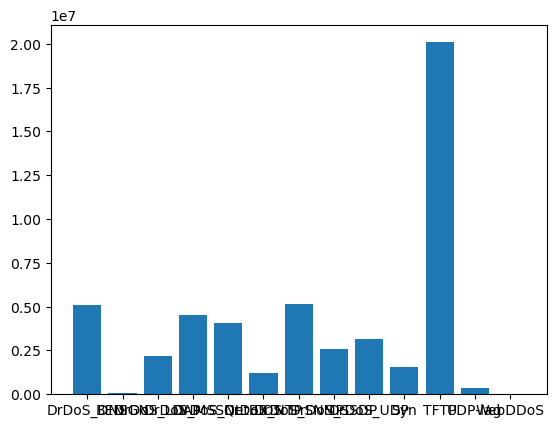

In [53]:
%store -r classes_distribution
plt.bar(classes_distribution.keys(), classes_distribution.values())
plt.show()

In [54]:
del classes_distribution['WebDDoS'] #we will drop this label across the dataset

min_val=min(classes_distribution.values())
smallest_class=[k for k, v in classes_distribution.items() if v==min_val][0]
print('The class that has less item is', smallest_class, 'with', min_val, 'items.')

The class that has less item is BENIGN with 56863 items.


---
## Balancing the dataset

As discovered we have too much samples and little computing power. In order to not waste data we have for the benign class, since all classes are skewed, we are going to add only the 'Benign' samples from the tests day to the data coming from the training day. Then balance classes by cutting them down to the cardinality of 'Benign' class (which is the class that has less samples). This will get us a balanced-by-construction and one-file-only dataset that we will split later in train and test samples for the NN (ignoring the original dataset structure). The resulting csv file will have about 1 million observations that are more than enough, anyways.

In [55]:
classes_ids={}
classes_ids=classes_ids.fromkeys(classes_distribution)

one_hot_encoding=torch.nn.functional.one_hot(torch.arange(0,12),num_classes=12)
one_hot_encoding

for idx,(k,_) in enumerate(classes_ids.items()):
    classes_ids[k]=(idx,one_hot_encoding[idx])

classes_ids

{'DrDoS_DNS': (0, tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 'BENIGN': (1, tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 'DrDoS_LDAP': (2, tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 'DrDoS_MSSQL': (3, tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])),
 'DrDoS_NetBIOS': (4, tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])),
 'DrDoS_NTP': (5, tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])),
 'DrDoS_SNMP': (6, tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])),
 'DrDoS_SSDP': (7, tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])),
 'DrDoS_UDP': (8, tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])),
 'Syn': (9, tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])),
 'TFTP': (10, tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])),
 'UDP-lag': (11, tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))}

In [56]:
replacement_dict={}
replacement_dict.fromkeys(classes_ids)
for k,(_, tensor) in classes_ids.items():
    replacement_dict[k]=tensor

replacement_dict

{'DrDoS_DNS': tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'BENIGN': tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'DrDoS_LDAP': tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'DrDoS_MSSQL': tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'DrDoS_NetBIOS': tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 'DrDoS_NTP': tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 'DrDoS_SNMP': tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 'DrDoS_SSDP': tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 'DrDoS_UDP': tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 'Syn': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 'TFTP': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 'UDP-lag': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [81]:
seen_class_samples = {}
rows_to_drop=[]

seen_class_samples=seen_class_samples.fromkeys(classes_distribution, 0)
seen_class_samples['WebDDoS'] = 0

only_header=pd.read_csv(csv_files[0], nrows=0)
only_header.columns=only_header.columns.str.strip()
only_header.drop(['Unnamed: 0','Timestamp','Source Port','Source IP','SimillarHTTP','Protocol','Flow ID','Destination IP'], axis=1, inplace=True)
only_header.to_csv('.\\datasets\\CICDDoS2019\\cut\\dataset.csv', mode='w', index=False, header=True) #copy only header to final jumbo csv

for ds in csv_files: #for every dataset
    print(ds)
    with pd.read_csv(ds, chunksize=10**6) as reader: #that has to be processed in chunks
        for chunk in reader:
            chunk.columns = chunk.columns.str.strip()
            rows_to_drop=[]

            print(chunk.index)
            print('Chunk length before drop: ', len(chunk))
            for line_idx in chunk.index:
                label = str(chunk.loc[line_idx, 'Label'])
                seen_class_samples[label] += 1
                if seen_class_samples[label]>min_val:
                    rows_to_drop.append(line_idx)

            ch_copy=chunk.drop(index=rows_to_drop, inplace=False) #drop if too many
            ch_copy=ch_copy[ch_copy['Label'] != 'WebDDoS'] #drop webddos class
            #ch_copy.replace({'Label': replacement_dict}, inplace=True)
            ch_copy.drop(['Unnamed: 0','Timestamp','Source Port','Source IP','SimillarHTTP','Protocol','Flow ID','Destination IP'], axis=1, inplace=True)

            print('Chunk length after drop: ', len(ch_copy))
            ch_copy.to_csv('.\\datasets\\CICDDoS2019\\cut\\dataset.csv', mode='a', index=False, header=False) #append with no header
            

.\datasets\CICDDoS2019\train\DrDoS_DNS.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  58869


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  178


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=3000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  138


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=3000000, stop=4000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  172


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=4000000, stop=5000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  296


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=5000000, stop=5074413, step=1)
Chunk length before drop:  74413
Chunk length after drop:  612
.\datasets\CICDDoS2019\train\DrDoS_LDAP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  57618


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  727


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=2181542, step=1)
Chunk length before drop:  181542
Chunk length after drop:  130
.\datasets\CICDDoS2019\train\DrDoS_MSSQL.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  57875


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  94


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=3000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  400


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=3000000, stop=4000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  414


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=4000000, stop=4524498, step=1)
Chunk length before drop:  524498
Chunk length after drop:  86
.\datasets\CICDDoS2019\train\DrDoS_NetBIOS.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  57717


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  370


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=3000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  298


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=3000000, stop=4000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  184
RangeIndex(start=4000000, stop=4094986, step=1)
Chunk length before drop:  94986
Chunk length after drop:  1
.\datasets\CICDDoS2019\train\DrDoS_NTP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  70414


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=1217007, step=1)
Chunk length before drop:  217007
Chunk length after drop:  814
.\datasets\CICDDoS2019\train\DrDoS_SNMP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  57567


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  465


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=3000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  122


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=3000000, stop=4000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  82


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=4000000, stop=5000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  52


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=5000000, stop=5161377, step=1)
Chunk length before drop:  161377
Chunk length after drop:  82
.\datasets\CICDDoS2019\train\DrDoS_SSDP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  57163


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  431


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=2611374, step=1)
Chunk length before drop:  611374
Chunk length after drop:  32
.\datasets\CICDDoS2019\train\DrDoS_UDP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  57995


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  711


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=3000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  301
RangeIndex(start=3000000, stop=3136802, step=1)
Chunk length before drop:  136802
Chunk length after drop:  13
.\datasets\CICDDoS2019\train\Syn.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  57208


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=1582681, step=1)
Chunk length before drop:  582681
Chunk length after drop:  47
.\datasets\CICDDoS2019\train\TFTP.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=1000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  58029


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=1000000, stop=2000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  497


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=2000000, stop=3000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  183


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=3000000, stop=4000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  249


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=4000000, stop=5000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  191


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=5000000, stop=6000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  276


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=6000000, stop=7000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  87


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=7000000, stop=8000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  80


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=8000000, stop=9000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  134


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=9000000, stop=10000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  182


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=10000000, stop=11000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  326


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=11000000, stop=12000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  86
RangeIndex(start=12000000, stop=13000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  73


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=13000000, stop=14000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  85


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=14000000, stop=15000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  140


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=15000000, stop=16000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  407


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=16000000, stop=17000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  167


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=17000000, stop=18000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  247


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=18000000, stop=19000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  473


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=19000000, stop=20000000, step=1)
Chunk length before drop:  1000000
Chunk length after drop:  677


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=20000000, stop=20107827, step=1)
Chunk length before drop:  107827
Chunk length after drop:  19521
.\datasets\CICDDoS2019\train\UDPLag.csv


C:\Users\MAX\AppData\Local\Temp\ipykernel_42040\4216017218.py:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


RangeIndex(start=0, stop=370605, step=1)
Chunk length before drop:  370605
Chunk length after drop:  60568


In [63]:
final_ds='.\\datasets\\CICDDoS2019\\cut\\dataset.csv'

In [60]:
sizes = str(os.path.getsize(final_ds)/(2.0**30)) + " GB"
sizes

'0.2216374482959509 GB'

In [82]:
classes_distribution_cut = {}
classes_distribution_cut=classes_distribution_cut.fromkeys(classes_ids, 0)

with pd.read_csv(final_ds, chunksize=10**6) as reader:
    for chunk in reader:
        chunk.columns = chunk.columns.str.strip()
        
        labels_count = chunk['Label'].value_counts()

        for class_,count in labels_count.iteritems():
            #print(class_, count)
            if class_ in classes_distribution_cut.keys():
                classes_distribution_cut[class_] += count
            else:
                classes_distribution_cut[class_] = count

classes_distribution_cut

{'DrDoS_DNS': 56863,
 'BENIGN': 56863,
 'DrDoS_LDAP': 56863,
 'DrDoS_MSSQL': 56863,
 'DrDoS_NetBIOS': 56863,
 'DrDoS_NTP': 56863,
 'DrDoS_SNMP': 56863,
 'DrDoS_SSDP': 56863,
 'DrDoS_UDP': 56863,
 'Syn': 56863,
 'TFTP': 56863,
 'UDP-lag': 56863}

In [84]:
%store classes_distribution_cut

Stored 'classes_distribution_cut' (dict)


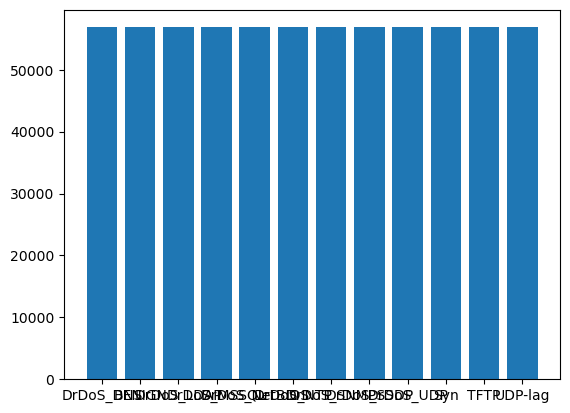

In [85]:
%store -r classes_distribution_cut
plt.bar(classes_distribution_cut.keys(), classes_distribution_cut.values())
plt.show()